#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT THE VALUE OF TIME SERIES DATA BASED ON THE GOOGLE/ALPHABET STOCK

#### I CHOSE THIS COMPANY BECAUSE IT IS THE WORLD LARGEST TECH COMPANY AND I PERSONALLY OWN IT IN MY INVESTMENT PORTFOLIO

In [ ]:
pip install yfinance

In [269]:
import yfinance as yf

import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

from sklearn import linear_model
from sklearn import  metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#### DATA IMPORT USING YFINANCE

In [270]:
data = yf.download('GOOGL', index_col = 0, squeeze = True, parse_dates=['Date'])

[*********************100%***********************]  1 of 1 completed


#### DATA PRINT

In [271]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-02-06,102.400002,104.360001,101.879997,102.900002,102.900002,31999600
2023-02-07,103.220001,108.180000,103.120003,107.639999,107.639999,49010200
2023-02-08,102.050003,103.139999,98.040001,99.370003,99.370003,94743500


#### CONCLUSION: COLUMNS IN IMPORTED DATA REPRESENT RESPECTIVELY: OPENING PRICE IN THE SESSION, MAXIMUM PRICE DURING THE SESSION, MINIMUM PRICE IN THE SESSION, CLOSING PRICE IN THE SESSION AND TRADING VOLUME, ROWS/INDEXES REPRESENT TRADING DAY

#### DATA DIMENSIONS PRINT

In [272]:
data.shape

(4653, 6)

#### CHECKING IF THERE ARE MISSING VALUES IN THE DATA

In [273]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### CONCLUSION: IMPORTED DATA IS CLEAN - NO MISSING VALUES PRESENT

#### FILTERING ANALYZED DATA - WE ARE INTERESTED IN THE CLOSING PRICE

In [274]:
data = data['Close']

#### PLOTTING CHART OF THE CLOSING PRICE OVER TIME

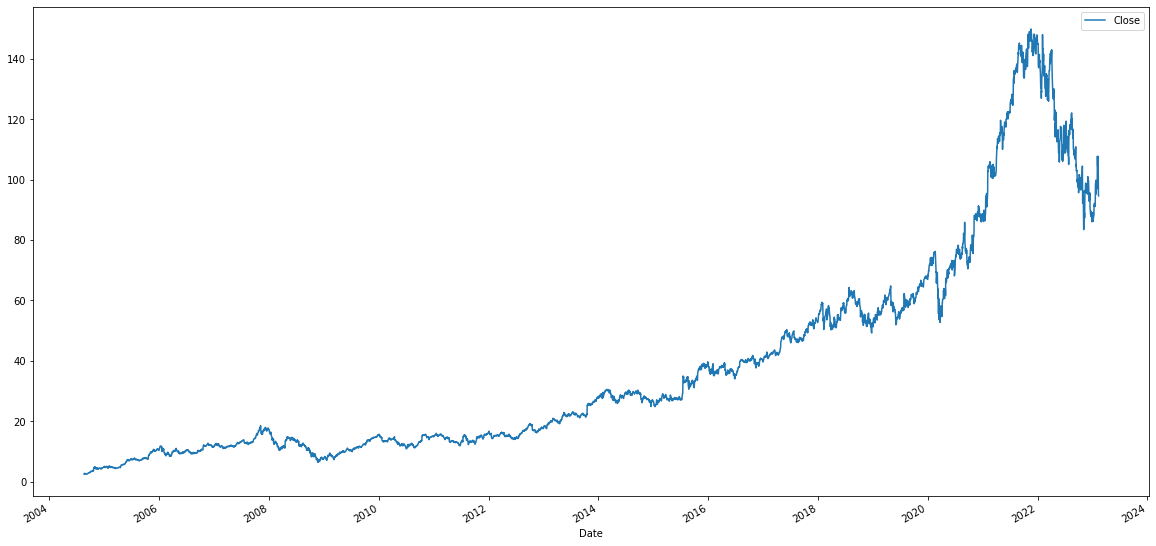

In [275]:
plt.figure(figsize=(20, 10))

data.plot()

plt.legend(loc='best')
plt.show()

#### DEFINING FUNCTION TEST_STATIONARITY TO CHECK STATIONARITY OF TIME-SERIES DATA

In [276]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()#.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(20,10));
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#### TIME-SERIES DATA STATIONARITY CHECK

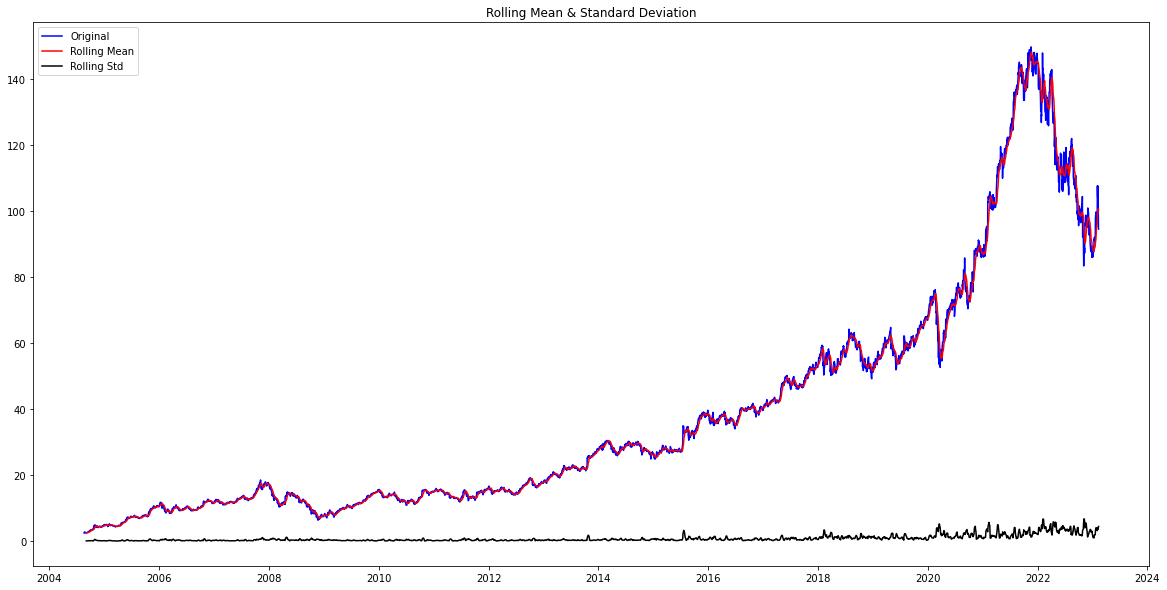

Results of Dickey-Fuller Test:
Test Statistic                   -0.134082
p-value                           0.945936
#Lags Used                       23.000000
Number of Observations Used    4629.000000
Critical Value (1%)              -3.431763
Critical Value (5%)              -2.862165
Critical Value (10%)             -2.567102
dtype: float64


In [277]:
test_stationarity(data)

#### P-VALUE CHECK

In [278]:
_,pval,_,_,_,_ =adfuller(data, autolag='AIC')
pval

0.9459362373452094

#### P-VALUE CHECK

In [279]:
if pval > 0.05:
    print('pval > 0.05 -> ZERO HYPOTHESIS TRUE -> TIME-SERIES DATA IS NOT STATIONARY')
else:
    print('pval < = 0.05 -> ZERO HYPOTHESIS FALSE -> TIME-SERIES DATA IS STATIONARY')

pval > 0.05 -> ZERO HYPOTHESIS TRUE -> TIME-SERIES DATA IS NOT STATIONARY


#### AUTO-CORRELATION CHECK

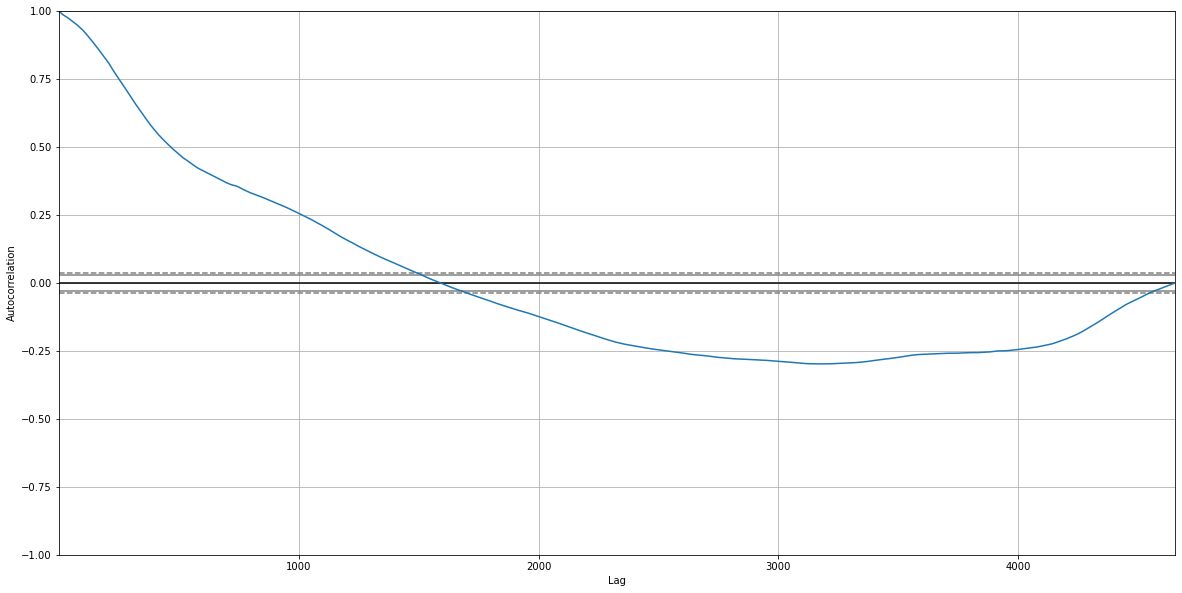

In [280]:
plt.figure(figsize=(20,10))

autocorrelation_plot(data)

plt.show()

#### AUTO-CORRELATION CHECK

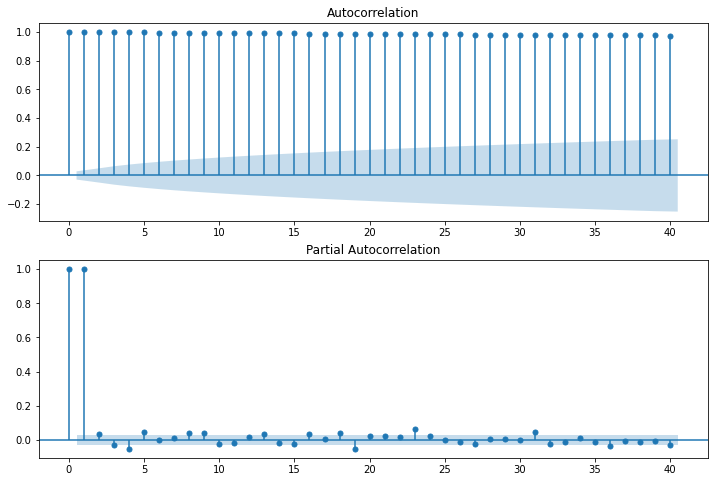

In [281]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.values, lags=40, ax=ax2)

plt.show()

#### DEFINING SIZE OF TEST DATA SECTION

In [282]:
test_size = 0.2

#### DATA TRANSFORMATION FOR LSTM NEURAL NETWORK PURPOSES

In [283]:
data_lstm = data.values.reshape(-1,1)

#### TRAIN-TEST DATA SPLIT

In [284]:
training_data_size = int(len(data_lstm)*(1-test_size))
test_data_size = len(data_lstm)-training_data_size

#### TRAIN-TEST DATA SPLIT

In [285]:
train_data = data_lstm[0:training_data_size,:]
test_data = data_lstm[training_data_size:len(data_lstm),:1]

#### TRANSFORMING DIVIDED DATA TO FEED LSTM NEURAL NETWORK

In [286]:
scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

#### DEFINING THE TIME_STEP PARAMETER I.E. THE NUMBER OF PAST OBSERVATIONS BASED ON WHICH WE WILL TRY TO PREDICT THE NEXT OBSERVATION

In [287]:
time_step = 5

#### DEFINING CREATE_DATASET FUNCTION

In [288]:
def create_dataset(dataset, time_step=time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

X_train, y_train = create_dataset(train_data_scaled, time_step)
X_test, y_test = create_dataset(test_data_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#### DEFINING LSTM NEURAL NETWORK MODEL

In [289]:
model_lstm=Sequential()
model_lstm.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50,return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer ='adam', metrics=['mse', 'mae'])

model_lstm.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
223/223 [==============================] - 12s 19ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0451 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0393
Epoch 2/30
223/223 [==============================] - 3s 14ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0235 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0298
Epoch 3/30
 96/223 [===========>..................] - ETA: 1s - loss: 8.4723e-04 - mse: 8.4723e-04 - mae: 0.0196

KeyboardInterrupt: 

#### DATA PREDICTION WITH LSTM NEURAL NETWORK MODEL FOR TRAINING AND TEST DATA

In [ ]:
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

#### TRANSFORMATION OF DATA FOR CORRECT PLOTTING

In [ ]:
train_predict_inverted = scaler.inverse_transform(train_predict)
test_predict_inverted = scaler.inverse_transform(test_predict)

train_predict_inverted_zeros = np.zeros(time_step+1)
train_predict_inverted_final = np.insert(train_predict_inverted, 0, train_predict_inverted_zeros)

test_predict_inverted_zeros = np.zeros(train_predict_inverted_final.shape[0]+ time_step+1)
test_predict_inverted_final= np.insert(test_predict_inverted, 0, test_predict_inverted_zeros)

#### PLOTTING IMPORTED DATA AND PREDICTIONS USING LSTM NEURAL NETWORK MODEL FOR TRAINING AND TEST DATA SECTIONS

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(train_predict_inverted_final, label='LSTM_train_pred')
plt.plot(test_predict_inverted_final, label = 'LSTM_test_pred')
plt.plot(data.values, label= 'data')

plt.legend(loc='best')
plt.grid()
plt.xlabel('OBSERVATION')
plt.ylabel('PRICE')
plt.show()

#### CALCULATION OF QUALITY METRICS FOR PREDICTED VALUES FROM TEST DATA SECTION FOR LSTM NEURAL NETWORK MODEL

In [ ]:
lstm_mean_squared_error = metrics.mean_squared_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_mean_absolute_error = metrics.mean_absolute_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_median_absolute_error = metrics.median_absolute_error(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_explained_variance_score = metrics.explained_variance_score(test_predict_inverted, data.values[-test_data_size+time_step+1:])

lstm_r2 = metrics.r2_score(test_predict_inverted, data.values[-test_data_size+time_step+1:])

#### CREATION AND ON-SCREEN PRINTING OF DATAFRAME WITH QUALITY METRICS FOR LSTM NEURAL NETWORK MODEL

In [ ]:
d_1 = {'r2': [lstm_r2],
     'explained_variance_score': [lstm_explained_variance_score], 
     'median_absolute_error': [lstm_median_absolute_error],
     'mean_squared_error' : [lstm_mean_squared_error],
     'mean_absolute_error' : [lstm_mean_absolute_error],
    }

df_1 = pd.DataFrame(data=d_1)
df_1.insert(loc=0, column='Method', value=['LSTM'])

df_1

#### DEFINING SERIES_TO_SUPERVISED FUNCTION

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#### DEFINING RANGE FOR TRAIN-TEST DATA 

In [ ]:
data_values = data.values

data_train = data[:-test_data_size]
data_test = data[-test_data_size:]

#### PLOTTING CHART OF TRAIN AND TEST DATA BEFORE THE TRANSFORMATION

In [ ]:
plt.figure(figsize=(20, 10))

data_train.plot(label = 'train')
data_test.plot(label = 'test')

plt.legend(loc='best')
plt.grid()
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.show()

#### TRANSFORMING AND PRINTING IMPORTED TIME-SERIES DATA USING PREVIOUSLY DEFINED FUNCTION SERIES_TO_SUPERVISED

In [ ]:
df = pd.DataFrame()
df['t'] = [x for x in data]

dataframe = series_to_supervised(df, time_step, 1)

dataframe

In [ ]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

#### TRAIN-TEST DATA SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#### DEFINING CROSS-VALIDATION PARAMETERS TO AVOID OVER-FITTING

In [ ]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING ELASTIC NET REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [ ]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING LASSO REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [ ]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING RIDGE REGRESSION METHOD
#### ANALYZED DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### ANALYZED ALPHA COEFFICIENT: 1, 2, 3
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [ ]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, max_iter=1000, random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [1, 2, 3]},
                    cv=kfold,
                    refit=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

#### SEARCHING FOR THE OPTIMAL DEGREE OF A POLYNOMIAL USING POLYNOMIAL REGRESSION METHOD.
#### ANALYZING DEGREES OF POLYNOMIAL: FROM 1 TO 4
#### RETURN OPTIMAL DEGREE OF POLYNOMIAL

In [ ]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

#### DEFINING AND TRAINING MLP REGRESSOR NEURAL NETWORK

In [ ]:
grid_5 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001,max_iter=1000),
                    param_grid={'hidden_layer_sizes': [(1000,1000,1000),(100,100,100),(10,10,10)],
                                'alpha': [1, 10, 100 ,1000],
                               'activation': ['identity', 'logistic', 'tanh', 'relu']                               
                               },
                    cv = kfold,
                    n_jobs=1,
                    refit=True)

grid_5.fit(X_train,y_train)
grid_5.best_params_

#### CREATION LIST OF OPTIMAL R^2, VAR, MAE, MSE PARAMETERS FOR ALL ANALYZED METHODS

In [ ]:
models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('MLP_R', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

print('LSTM')
print("R^2: {}".format(lstm_r2))
print("Explained variance score: {}".format(lstm_explained_variance_score))
print("Median absolute error: {}".format(lstm_median_absolute_error))
print("Mean squared error: {}".format(lstm_mean_absolute_error))
print("Mean absolute errors: {}".format(lstm_mean_absolute_error))

#### CREATION AND PRINT OF DATAFRAME INCLUDING R^2, VAR, MAE, MSE PARAMETERS FOR ALLANALYZED METHODS

In [ ]:
d_2 = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }

df_2 = pd.DataFrame(data=d_2)

df_2.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge', 'LR', 'MLP_R'])

df_2

#### PRINTING PREVIOUSLY CREATED DATAFRAME WITH QUALITY METRICS FOR LSTM NEURAL NETWORK

In [ ]:
df_1

#### PRINTING PREVIOUSLY CREATED DATAFRAME WITH QUALITY METRICS FOR THE REST OF ANALYZED MODELS

In [ ]:
df_2

#### MERGING BOTH DATAFRAMES WITH QUALITY METRICS

In [ ]:
df = pd.concat([df_1, df_2])

#### PRINTING MERGED DATAFRAME

In [ ]:
df

#### FILTERING DATAFRAME FOR THE MAXIMUM R^2 VALUE CORRESPONDING WITH THE MOST EFFECTIVE MODEL/ALGORITHM

In [ ]:
df[df['r2'] == df['r2'].max()]

#### TRANSFORMATION OF DATA TO PLOT CORRECTLY

In [ ]:
data_train_zeros = np.zeros(data_train.values.shape[0])
data_test_chart= np.insert(data_test.values, 0, data_train_zeros)

#### PLOT TRAINING DATA SECTION, TEST DATA SECTION AND PREDICTED DATA FOR ALL MODELS - MODELS PREDICT LAST 20% OBSERVATIONS FROM DATA

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(data_train.values, label = 'train')
plt.plot(data_test_chart, label = 'test')

all_data = []

for name, model in models: 
    data = np.zeros(data.shape[0], dtype=float)
    data.fill(np.nan)
    
    for i in range(1,test_data_size):
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
        
    all_data.append(data)
        
    plt.plot(data , label=name)
    
    
plt.plot(test_predict_inverted_final, label='LSTM')
plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOT TEST DATA SECTION AND PREDICTED DATA FOR ALL MODELS

In [ ]:
# NARYSOWANIE WYKRESU DLA CZĘŚCI TESTOWEJ NAUCZONYCH MODELI

plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,test_data_size):
        data_chart = data_test.values
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 450 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,450):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 225 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,225):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 110 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,110):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 55 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,55):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('AMOUNT OF PAST OBSERVATIONS')
plt.ylabel('PRICE')
plt.show()

#### PLOTTING LAST 25 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,25):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Ilosc ostatnich dni')
plt.ylabel('Cena')
plt.show()

#### PLOTTING LAST 12 OBSERVATIONS AND ITS PREDICTIONS FOR ALL MODELS

In [ ]:
plt.figure(figsize=(20,10))

for name, model in models: 
    
    for i in range (1,12):
        data_chart = data_test.values
    
        point = np.array([data_values[ (data_values.shape[0]-((time_step+1*i))):(data_values.shape[0]-(1*i))]])
        pre=model.predict(point)
        data[-i]=pre
       
    plt.plot( data[-i:] , label=name)

plt.plot(data_chart[-i:], 'k--', label='test')
plt.plot(test_predict_inverted_final[-i:], label='LSTM')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Ilosc ostatnich dni')
plt.ylabel('Cena')
plt.show()

#### CONCLUSION_1: DESPITE THE FACT THAT THE ANALYZED MODELS PREDICT OBSERVATIONS IN SATISFACTORY WAY FOR TEST DATA, IT IS IMPORTANT TO REMEMBER THAT THE MODEL PREDICTS VALUES BASED ON OBSERVATIONS FROM THE PAST, MODEL IS SENSITIVE TO UNEXPECTED EVENTS HAVING LOW PROBABILITY AND INTRODUCING HIGH VOLATILITY TO THE STOCK SO-CALLED "BLACK SWANS"

#### CONCLUSION_2: LSTM NEURAL NETWORK DESPITE BEING A MORE COMPLEX TOOL FOR TIME SERIES PREDICTION THAN OTHER MODELS ACHIEVES RESULTS LESS SATISFACTORY THAN SIMPLER METHODS, WHICH ADDITIONALLY COMPUTE FASTER

#### CONCLUSION_3: TO GET BETTER RESULTS - ESPECIALLY FOR THE LSTM NEURAL NETWORK MODEL ONE SHOULD INCREASE THE TIME_STEP PARAMETER WHICH DEFINES THE NUMBER OF "PAST" OBSERVATIONS ON THE BASIS WHICH WE PREDICT THE "FUTURE" OBSERVATION

#### CONCLUSION_4: SIMPLER METHODS - LINEAR REGRESSION, LASSO REGRESSION, RIDGE REGRESSION, ELASTIC_NET ACHIEVE BETTER RESULTS THAN LSTM NEURAL NETWORK

In [ ]:
data_train = data[:-test_data_size]

In [ ]:
df = pd.DataFrame()
df['t'] = [x for x in data_train]

dataframe = series_to_supervised(df, time_step, 1)

dataframe

In [ ]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [ ]:
test_predictor = X[-1:].reshape(1,-1)
training_predictor = X[-1:].tolist()[0]


predictors = []
test_list = []
test_values_real = []

for predictor in training_predictor:
    
    predictors.append(predictor)
    
print('PREDICTORS FROM TRAINING DATA: {}' .format(predictors))
         
for name, model in models:
        
    for i in range(test_data_size):
                        
        test_val= model.predict(test_predictor)
        test_val_clean = test_val.item()
    
    #print('PREDICTION FROM PREDICTORS: {}' .format(test_val_clean))
        
        test_list.append(test_val_clean)
        predictors.append(test_val_clean)
    
        del predictors[0]
    
    #print('NEW PREDICTORS TO FORM TEST DATA: {}' .format(predictors))
    
        test_predictor = np.array(predictors).reshape(1,-1)
        
    test_list_array = np.array(test_list)
    test_values_real.append(test_list_array)
        
    print('COMPUTED PREDICTIONS FOR {} TO FORM TEST DATA: {}'.format(name, test_list_array))
        
    test_list.clear()
        
    del test_predictor
        
    test_predictor = X[-1:].reshape(1,-1)

In [ ]:
for i in test_values_real:
    
    print("R^2: {}".format(metrics.r2_score(y_test,i[:-1])))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test,i[:-1])))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test,i[:-1])))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test,i[:-1])))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test,i[:-1])))

In [ ]:
r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for i in test_values_real:
    r2.append(metrics.r2_score(y_test, i[:-1]))
    explained_variance_score.append(metrics.explained_variance_score(y_test, i[:-1]))
    median_absolute_error.append( metrics.median_absolute_error(y_test, i[:-1]))
    mean_squared_error.append(metrics.mean_squared_error(y_test, i[:-1]))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, i[:-1]))

In [ ]:
df3 = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }

df_3 = pd.DataFrame(data=df3)

df_3.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge', 'LR', 'MLP_R'])

df_3

In [ ]:
df = pd.concat([df_1, df_3])

In [ ]:
df

In [ ]:
df[df['r2'] == df['r2'].max()]

#### CONCLUSION_1:

#### CONCLUSION_2:

#### CONCLUSION_3: